In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)

In [2]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df
    
def filter_with_threshold_percentage(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}")
    if n is None:
        n = df.shape[0]
    print(f"n= {n}")
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [3]:
def filter_with_threshold_count(df, column_name, threshold, n=None):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    count_column_name = column_name + "_count"
    filtered_count_df = count_df[count_df[count_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [4]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# UniRef90 - EMBL mapping Dataset Generation


### uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv

In [5]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv")

In [6]:
df = pd.read_csv(file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

### Deduplicate: Remove duplicates, retain the first occurence
#### TODO: Investigate the presence of 5 duplicate records

In [7]:
df = df[~df.duplicated()]

In [8]:
print("df size = ", df.shape)
df.head()

df size =  (267860, 11)


uniref90_id  tax_id embl_ref_id    embl_host_name virus_host_name                      virus_name virus_taxon_rank  virus_host_tax_id virus_host_taxon_rank                                                seq  seq_len
0      UniRef90_D6NXI8   11676  ADF86160.1  ['Homo sapiens']    Homo sapiens  Human immunodeficiency virus 1          species               9606               species  MAGRSGDSDEELLRVVRIIKQIYQSNPPPNPEGTRQARRNRRRRWR...      116
1      UniRef90_L0BZL1   11676  AFZ96186.1  ['Homo sapiens']    Homo sapiens  Human immunodeficiency virus 1          species               9606               species  EXEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKRTQ...      199
2      UniRef90_D6NXI9   11676  ADF86161.1  ['Homo sapiens']    Homo sapiens  Human immunodeficiency virus 1          species               9606               species  MAGRSGDSDEXLLRTIRLIRILYQSNPPPSSKGTRQARRNRRRRWR...       94
3  UniRef90_A0A023HQ48   28875  AGO66969.1  ['Homo sapiens']    Homo sapiens                     Rotavirus A          species               9606               species  KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...      218
4      UniRef90_L0BZL4   11676  AFZ95585.1  ['Homo sapiens']    Homo sapiens  Human immunodeficiency virus 1          species               9606               species  PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...      377

In [9]:
column_stats(df, "virus_name")

Number of unique values = 3779
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            215415           80.420742
1                                   Hepacivirus hominis             10947            4.086836
2                                     Hepatitis B virus             10152            3.790040
3                          Human immunodeficiency virus              2095            0.782125
4                                  Human papillomavirus              1078            0.402449
5                   Simian-Human immunodeficiency virus              1030            0.384529
6                        Human immunodeficiency virus 2               788            0.294184
7                                           Rotavirus A               749            0.279624
8                                         Riboviria sp.               563            0.210184
9                         Sim

virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            215415           80.420742
1                                   Hepacivirus hominis             10947            4.086836
2                                     Hepatitis B virus             10152            3.790040
3                          Human immunodeficiency virus              2095            0.782125
4                                  Human papillomavirus              1078            0.402449
5                   Simian-Human immunodeficiency virus              1030            0.384529
6                        Human immunodeficiency virus 2               788            0.294184
7                                           Rotavirus A               749            0.279624
8                                         Riboviria sp.               563            0.210184
9                         Simian immunodeficiency virus               538            0.200851
10                                Marmot picobirnavirus               529            0.197491
11                              Paslahepevirus balayani               431            0.160905
12                                    Bacteriophage sp.               411            0.153438
13                                Hepatitis delta virus               400            0.149332
14                                     Carp edema virus               392            0.146345
15                                    Torque teno virus               369            0.137759
16                              Human betaherpesvirus 6               295            0.110132
17                                   Feline calicivirus               250            0.093332
18                                       Vaccinia virus               241            0.089972
19                             Mammarenavirus lassaense               231            0.086239
20                                        Enterovirus B               216            0.080639
21                            African swine fever virus               198            0.073919
22                        Feline immunodeficiency virus               198            0.073919
23                        Lymphocystis disease virus Sa               175            0.065333
24                                    Chikungunya virus               174            0.064959
25                                     BeAn 58058 virus               159            0.059359
26                                      Eptesipox virus               154            0.057493
27                                Bufonid herpesvirus 1               152            0.056746
28                         Saltwater crocodilepox virus               149            0.055626
29                                         Rhinovirus C               138            0.051519
30                          Molluscum contagiosum virus               138            0.051519
31                                   Teiidae poxvirus 1               138            0.051519
32                                     Hypsugopox virus               137            0.051146
33                                 Cheloniid poxvirus 1               133            0.049653
34                             Scale drop disease virus               132            0.049279
35                                  Betatorquevirus sp.               125            0.046666
36                                      Mamastrovirus 3               123            0.045920
37                                    Magpiepox virus 2               123            0.045920
38                                    Mamastrovirus sp.               122            0.045546
39                                  Cetacean poxvirus 1               117            0.043680
40                                       Circovirus sp.               115            0.042933
41                                         Rhinovirus A               114            0.042560
42 

In [10]:
column_stats(df, "virus_host_name")

Number of unique values = 1314
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                 247413                92.366535
1                                            Sus scrofa                   1286                 0.480102
2                                        Macaca mulatta                   1081                 0.403569
3                             Hydrochoerus hydrochaeris                    627                 0.234078
4                                    Marmota himalayana                    539                 0.201225
5                                         Gallus gallus                    484                 0.180691
6                                           Felis catus                    441                 0.164638
7                                       Cyprinus carpio                    411                 0.153438
8                                

virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                 247413                92.366535
1                                            Sus scrofa                   1286                 0.480102
2                                        Macaca mulatta                   1081                 0.403569
3                             Hydrochoerus hydrochaeris                    627                 0.234078
4                                    Marmota himalayana                    539                 0.201225
5                                         Gallus gallus                    484                 0.180691
6                                           Felis catus                    441                 0.164638
7                                       Cyprinus carpio                    411                 0.153438
8                                    Petroica australis                    408                 0.152318
9                                     Gopherus morafkai                    292                 0.109012
10                                    Peromyscus boylii                    282                 0.105279
11                                 Marmota flaviventris                    271                 0.101172
12                                           Bos taurus                    261                 0.097439
13                                     Eptesicus fuscus                    255                 0.095199
14                                   Loxodonta africana                    213                 0.079519
15                                  Mastomys natalensis                    207                 0.077279
16                                   Gymnorhina tibicen                    194                 0.072426
17                                       Eidolon helvum                    184                 0.068693
18                                      Ailurus fulgens                    178                 0.066453
19                                        Sparus aurata                    176                 0.065706
20                                      Elephas maximus                    172                 0.064213
21                                         Oryzomys sp.                    160                 0.059733
22                                     Lates calcarifer                    158                 0.058986
23                                            Bufo bufo                    152                 0.056746
24                                   Crocodylus porosus                    151                 0.056373
25                                       Equus caballus                    146                 0.054506
26                                    Rattus norvegicus                    146                 0.054506
27                                        Hypsugo savii                    146                 0.054506
28                                   Dipodomys merriami                    145                 0.054133
29                              Crocodilurus amazonicus                    138                 0.051519
30                                    Tarsiger cyanurus                    136                 0.050773
31                                       Chelonia mydas                    133                 0.049653
32                                         Mus musculus                    122                 0.045546
33                                      Cercocebus atys                    122                 0.045546
34                            Rhinolophus ferrumequinum                    115                 0.042933
35                                     Tursiops aduncus                    115                 0.042933
36                                           Ovis aries                    115                 0.042933
37                                Tadarida brasiliensis                    114          

min seq len = 11
max seq len = 8249


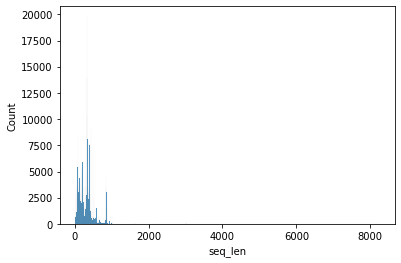

     start     end   count  percentage
0     11.0   697.5  246481   92.018592
1    697.5  1384.0   19558    7.301575
2   1384.0  2070.5     533    0.198985
3   2070.5  2757.0     552    0.206078
4   2757.0  3443.5     604    0.225491
5   3443.5  4130.0      57    0.021280
6   4130.0  4816.5      16    0.005973
7   4816.5  5503.0       6    0.002240
8   5503.0  6189.5       6    0.002240
9   6189.5  6876.0      18    0.006720
10  6876.0  7562.5      22    0.008213
11  7562.5  8249.0       7    0.002613


In [11]:
print_seq_len_histogram(df, 12)

## Non - Immunodeficiency Virus

In [12]:
virus_names = list(df["virus_name"].unique())
print(f"Number of unique viruses = {len(virus_names)}")
virus_names

Number of unique viruses = 3779


['Human immunodeficiency virus 1',
 'Rotavirus A',
 'Rhinovirus B',
 'Orthohantavirus puumalaense',
 'Hantavirus sp.',
 'Vientovirus',
 'Rhinovirus A',
 'Cencurut virus',
 'Hepatitis B virus',
 'Rhinovirus C',
 'Avian coronavirus',
 'Nyangole orthobunyavirus',
 'Betacoronavirus 1',
 'Feline leukemia virus',
 'Sapporo virus',
 'Paslahepevirus balayani',
 'Hepacivirus hominis',
 'Human papillomavirus',
 'Mastomys natalensis cytomegalovirus 2',
 'Mastomys natalensis cytomegalovirus 1',
 'Parechovirus A',
 'Macaca mulatta papillomavirus 5',
 'Macaca mulatta papillomavirus 7',
 'Macaca mulatta papillomavirus 6',
 'Betanodavirus sp.',
 'Enterovirus B',
 'Mammarenavirus loeiense',
 'Human rhinovirus sp.',
 'Penguin herpesvirus 2',
 'Volepox virus',
 'Skunkpox virus',
 'Chikungunya virus',
 'Paramyxovirus A69-1',
 'Paramyxovirus C40',
 'Paramyxovirus A69-2',
 'Orthonairovirus haemorrhagiae',
 'Lonchura striata deltavirus',
 'Herpesvirus DDDp',
 'Feline immunodeficiency virus',
 'Peromyscus leu

In [13]:
idv_names = list(filter(lambda x: "immunodeficiency" in x.lower(), virus_names))

In [14]:
idv_names

['Human immunodeficiency virus 1',
 'Feline immunodeficiency virus',
 'Simian immunodeficiency virus',
 'Human immunodeficiency virus',
 'Human immunodeficiency virus 2',
 'Simian-Human immunodeficiency virus',
 'Bovine immunodeficiency virus']

In [15]:
non_idv_df = df[~df["virus_name"].isin(idv_names)]
non_idv_df.shape

(47792, 11)

In [5]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
# non_idv_df.to_csv(output_file_path, index=False)

In [6]:
non_idv_df = pd.read_csv(output_file_path)
non_idv_df.shape

(47792, 11)

In [7]:
column_stats(non_idv_df, "virus_name")

Number of unique values = 3772
                                             virus_name  virus_name_count  virus_name_percent
0                                   Hepacivirus hominis             10947           22.905507
1                                     Hepatitis B virus             10152           21.242049
2                                  Human papillomavirus              1078            2.255608
3                                           Rotavirus A               749            1.567208
4                                         Riboviria sp.               563            1.178021
5                                 Marmot picobirnavirus               529            1.106880
6                               Paslahepevirus balayani               431            0.901825
7                                     Bacteriophage sp.               411            0.859977
8                                 Hepatitis delta virus               400            0.836960
9                            

virus_name  virus_name_count  virus_name_percent
0                                   Hepacivirus hominis             10947           22.905507
1                                     Hepatitis B virus             10152           21.242049
2                                  Human papillomavirus              1078            2.255608
3                                           Rotavirus A               749            1.567208
4                                         Riboviria sp.               563            1.178021
5                                 Marmot picobirnavirus               529            1.106880
6                               Paslahepevirus balayani               431            0.901825
7                                     Bacteriophage sp.               411            0.859977
8                                 Hepatitis delta virus               400            0.836960
9                                      Carp edema virus               392            0.820221
10                                    Torque teno virus               369            0.772096
11                              Human betaherpesvirus 6               295            0.617258
12                                   Feline calicivirus               250            0.523100
13                                       Vaccinia virus               241            0.504268
14                             Mammarenavirus lassaense               231            0.483344
15                                        Enterovirus B               216            0.451958
16                            African swine fever virus               198            0.414295
17                        Lymphocystis disease virus Sa               175            0.366170
18                                    Chikungunya virus               174            0.364078
19                                     BeAn 58058 virus               159            0.332692
20                                      Eptesipox virus               154            0.322230
21                                Bufonid herpesvirus 1               152            0.318045
22                         Saltwater crocodilepox virus               149            0.311768
23                                   Teiidae poxvirus 1               138            0.288751
24                          Molluscum contagiosum virus               138            0.288751
25                                         Rhinovirus C               138            0.288751
26                                     Hypsugopox virus               137            0.286659
27                                 Cheloniid poxvirus 1               133            0.278289
28                             Scale drop disease virus               132            0.276197
29                                  Betatorquevirus sp.               125            0.261550
30                                      Mamastrovirus 3               123            0.257365
31                                    Magpiepox virus 2               123            0.257365
32                                    Mamastrovirus sp.               122            0.255273
33                                  Cetacean poxvirus 1               117            0.244811
34                                       Circovirus sp.               115            0.240626
35                                         Rhinovirus A               114            0.238534
36                                       Microvirus sp.               112            0.234349
37                                    Porcine torovirus               110            0.230164
38                                   Picobirnavirus sp.               109            0.228072
39                             European chub iridovirus               108            0.225979
40                                       Pteropox virus               107            0.223887
41                                       Parechovirus A               103            0.215517
42 

In [8]:
column_stats(non_idv_df, "virus_host_name")

Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8                                

virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8                                     Gopherus morafkai                    292                 0.610981
9                                     Peromyscus boylii                    282                 0.590057
10                                 Marmota flaviventris                    271                 0.567041
11                                           Bos taurus                    257                 0.537747
12                                     Eptesicus fuscus                    255                 0.533562
13                                       Macaca mulatta                    232                 0.485437
14                                   Loxodonta africana                    213                 0.445681
15                                  Mastomys natalensis                    207                 0.433127
16                                   Gymnorhina tibicen                    194                 0.405926
17                                       Eidolon helvum                    184                 0.385002
18                                      Ailurus fulgens                    178                 0.372447
19                                        Sparus aurata                    176                 0.368262
20                                      Elephas maximus                    172                 0.359893
21                                         Oryzomys sp.                    160                 0.334784
22                                     Lates calcarifer                    158                 0.330599
23                                            Bufo bufo                    152                 0.318045
24                                   Crocodylus porosus                    151                 0.315952
25                                        Hypsugo savii                    146                 0.305490
26                                       Equus caballus                    146                 0.305490
27                                    Rattus norvegicus                    146                 0.305490
28                                   Dipodomys merriami                    145                 0.303398
29                              Crocodilurus amazonicus                    138                 0.288751
30                                    Tarsiger cyanurus                    136                 0.284566
31                                       Chelonia mydas                    133                 0.278289
32                                         Mus musculus                    122                 0.255273
33                            Rhinolophus ferrumequinum                    115                 0.240626
34                                           Ovis aries                    115                 0.240626
35                                     Tursiops aduncus                    115                 0.240626
36                                Tadarida brasiliensis                    114                 0.238534
37                                    Anas superciliosa                    114          

min seq len = 11
max seq len = 8249


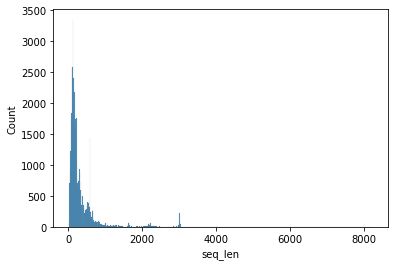

     start     end  count  percentage
0     11.0   697.5  44007   92.080264
1    697.5  1384.0   1967    4.115752
2   1384.0  2070.5    530    1.108972
3   2070.5  2757.0    552    1.155005
4   2757.0  3443.5    604    1.263810
5   3443.5  4130.0     57    0.119267
6   4130.0  4816.5     16    0.033478
7   4816.5  5503.0      6    0.012554
8   5503.0  6189.5      6    0.012554
9   6189.5  6876.0     18    0.037663
10  6876.0  7562.5     22    0.046033
11  7562.5  8249.0      7    0.014647


In [9]:
print_seq_len_histogram(non_idv_df, 12)

**Number of host classes**

In [10]:
# 1% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 1)

Size of df = (47792, 11)
n= 47792
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535

min seq len = 11
max seq len = 7217


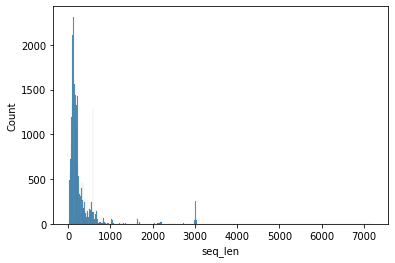

     start     end  count  percentage
0     11.0   611.5  29528   93.095403
1    611.5  1212.0   1159    3.654077
2   1212.0  1812.5    291    0.917460
3   1812.5  2413.0    218    0.687307
4   2413.0  3013.5    342    1.078252
5   3013.5  3614.0    162    0.510751
6   3614.0  4214.5      6    0.018917
7   4214.5  4815.0      5    0.015764
8   4815.0  5415.5      0    0.000000
9   5415.5  6016.0      0    0.000000
10  6016.0  6616.5      2    0.006306
11  6616.5  7217.0      5    0.015764


In [11]:
print_seq_len_histogram(filtered_df, 12)

In [24]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
# filtered_df.to_csv(output_file_path, index=False)

**Sequence Length Parameters**

In [25]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99.9])

array([ 591.   ,  710.   , 3036.283])

min seq len = 11
max seq len = 7217


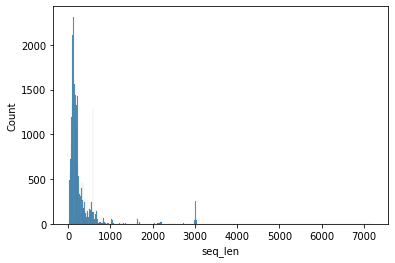

     start     end  count  percentage
0     11.0   611.5  29528   93.095403
1    611.5  1212.0   1159    3.654077
2   1212.0  1812.5    291    0.917460
3   1812.5  2413.0    218    0.687307
4   2413.0  3013.5    342    1.078252
5   3013.5  3614.0    162    0.510751
6   3614.0  4214.5      6    0.018917
7   4214.5  4815.0      5    0.015764
8   4815.0  5415.5      0    0.000000
9   5415.5  6016.0      0    0.000000
10  6016.0  6616.5      2    0.006306
11  6616.5  7217.0      5    0.015764


In [26]:
print_seq_len_histogram(filtered_df, 12)

In [27]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 3036]
seq_len_filtered_df.shape

(31686, 11)

In [28]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 5
             virus_host_name  virus_host_name_count  virus_host_name_percent
0               Homo sapiens                  28760                90.765638
1                 Sus scrofa                   1281                 4.042795
2  Hydrochoerus hydrochaeris                    627                 1.978792
3         Marmota himalayana                    539                 1.701067
4              Gallus gallus                    479                 1.511709


virus_host_name  virus_host_name_count  virus_host_name_percent
0               Homo sapiens                  28760                90.765638
1                 Sus scrofa                   1281                 4.042795
2  Hydrochoerus hydrochaeris                    627                 1.978792
3         Marmota himalayana                    539                 1.701067
4              Gallus gallus                    479                 1.511709

In [29]:
column_stats(seq_len_filtered_df, "virus_name")

Number of unique values = 660
                                            virus_name  virus_name_count  virus_name_percent
0                                  Hepacivirus hominis             10919           34.460014
1                                    Hepatitis B virus             10120           31.938396
2                                 Human papillomavirus              1078            3.402133
3                                          Rotavirus A               629            1.985104
4                                Marmot picobirnavirus               529            1.669507
5                                    Bacteriophage sp.               411            1.297103
6                                Hepatitis delta virus               400            1.262387
7                              Paslahepevirus balayani               380            1.199268
8                                    Torque teno virus               363            1.145616
9                              Human bet

virus_name  virus_name_count  virus_name_percent
0                                  Hepacivirus hominis             10919           34.460014
1                                    Hepatitis B virus             10120           31.938396
2                                 Human papillomavirus              1078            3.402133
3                                          Rotavirus A               629            1.985104
4                                Marmot picobirnavirus               529            1.669507
5                                    Bacteriophage sp.               411            1.297103
6                                Hepatitis delta virus               400            1.262387
7                              Paslahepevirus balayani               380            1.199268
8                                    Torque teno virus               363            1.145616
9                              Human betaherpesvirus 6               295            0.931011
10                                      Vaccinia virus               241            0.760588
11                                       Enterovirus B               210            0.662753
12                           African swine fever virus               198            0.624882
13                            Mammarenavirus lassaense               189            0.596478
14                                   Chikungunya virus               173            0.545982
15                                        Rhinovirus C               138            0.435524
16                         Molluscum contagiosum virus               138            0.435524
17                                 Betatorquevirus sp.               125            0.394496
18                                     Mamastrovirus 3               123            0.388184
19                                        Rhinovirus A               114            0.359780
20                                   Porcine torovirus               107            0.337689
21                                      Parechovirus A               103            0.325065
22                                      Circovirus sp.               102            0.321909
23                                Gammatorquevirus sp.                97            0.306129
24                              Human mastadenovirus D                97            0.306129
25                                       Norwalk virus                91            0.287193
26                                       Hepatovirus A                90            0.284037
27                                Human rhinovirus sp.                87            0.274569
28                               Gokushovirus WZ-2015a                80            0.252477
29                                     Alaskapox virus                80            0.252477
30                                     Enterovirus sp.                72            0.227230
31                                       Enterovirus A                69            0.217762
32                                     Human cosavirus                62            0.195670
33                              Porcine picobirnavirus                62            0.195670
34                                     Monkeypox virus                61            0.192514
35                              Torque teno midi virus                59            0.186202
36                                       Enterovirus C                53            0.167266
37                                       Sapporo virus                50            0.157798
38   Middle East respiratory syndrome-related coron...                50            0.157798
39                                   Avian coronavirus                49            0.154642
40                                     Human rotavirus                47            0.148330
41                                 TTV-like mini virus                47            0.148330
42                              Human mastade

In [30]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5_seq_len_in_99.9percentile.csv")
# seq_len_filtered_df.to_csv(output_file_path, index=False)

### Non Immunodeficiency Virus, hosts with < 1% prevalence in the dataset

In [31]:
hosts_with_one_percent_prevalence = seq_len_filtered_df["virus_host_name"].unique().tolist()
hosts_with_one_percent_prevalence

['Homo sapiens',
 'Sus scrofa',
 'Gallus gallus',
 'Marmota himalayana',
 'Hydrochoerus hydrochaeris']

In [32]:
non_idv_less_than_one_percent_prevalence_df = non_idv_df[~non_idv_df["virus_host_name"].isin(hosts_with_one_percent_prevalence)]
non_idv_less_than_one_percent_prevalence_df.shape

(16074, 11)

In [5]:
non_idv_less_than_one_percent_prevalence_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence.csv"))
non_idv_less_than_one_percent_prevalence_df.shape

(16074, 12)

In [12]:
np.percentile(non_idv_less_than_one_percent_prevalence_df["seq_len"].values, [90, 95, 99])

array([ 840.7 , 1446.  , 3025.27])

min seq len = 11
max seq len = 8249


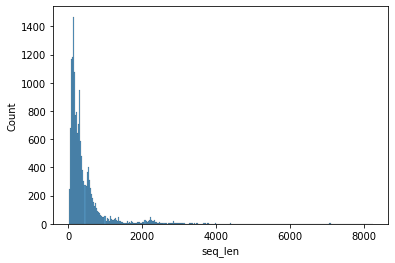

     start     end  count  percentage
0     11.0   697.5  13885   86.381734
1    697.5  1384.0   1340    8.336444
2   1384.0  2070.5    269    1.673510
3   2070.5  2757.0    339    2.108996
4   2757.0  3443.5    127    0.790096
5   3443.5  4130.0     51    0.317283
6   4130.0  4816.5     11    0.068433
7   4816.5  5503.0      6    0.037327
8   5503.0  6189.5      6    0.037327
9   6189.5  6876.0     15    0.093318
10  6876.0  7562.5     18    0.111982
11  7562.5  8249.0      7    0.043549


In [13]:
print_seq_len_histogram(non_idv_less_than_one_percent_prevalence_df, 12)

In [42]:
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df = non_idv_less_than_one_percent_prevalence_df[non_idv_less_than_one_percent_prevalence_df["seq_len"] <= 3025]
non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.shape

(15913, 11)

In [43]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1percent_prevalence_seq_len_in_99percentile.csv")
# non_idv_less_than_one_percent_prevalence_seq_len_filtered_df.to_csv(output_file_path)

#### Non-IDV with host prevalence < 1%, >=0.05%

In [6]:
filtered_df = filter_with_threshold_percentage(non_idv_less_than_one_percent_prevalence_df, "virus_host_name", 0.05, n=47792)

Size of df = (16074, 12)
n= 47792
Number of unique values = 1299
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                       Cyprinus carpio                    411                 0.859977
1                                    Petroica australis                    408                 0.853699
2                                           Felis catus                    298                 0.623535
3                                     Gopherus morafkai                    292                 0.610981
4                                     Peromyscus boylii                    282                 0.590057
5                                  Marmota flaviventris                    271                 0.567041
6                                            Bos taurus                    257                 0.537747
7                                      Eptesicus fuscus                    255                 0.533562

min seq len = 11
max seq len = 8108


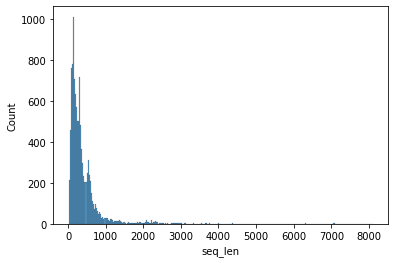

      start      end  count  percentage
0     11.00   685.75  10022   89.251046
1    685.75  1360.50    815    7.257993
2   1360.50  2035.25    148    1.318016
3   2035.25  2710.00    148    1.318016
4   2710.00  3384.75     49    0.436370
5   3384.75  4059.50     21    0.187016
6   4059.50  4734.25      7    0.062339
7   4734.25  5409.00      1    0.008906
8   5409.00  6083.75      1    0.008906
9   6083.75  6758.50      6    0.053433
10  6758.50  7433.25      9    0.080150
11  7433.25  8108.00      2    0.017811


In [8]:
filtered_df.shape
print_seq_len_histogram(filtered_df, 12)

In [38]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence.csv")
# filtered_df.to_csv(output_file_path)

In [11]:
np.percentile(filtered_df["seq_len"].values, [90, 95, 99])

array([ 716.  , 1068.8 , 2451.96])

In [12]:
seq_len_filtered_df = filtered_df[filtered_df["seq_len"] <= 2452]
seq_len_filtered_df.shape

(11116, 12)

In [13]:
column_stats(seq_len_filtered_df, "virus_host_name")

Number of unique values = 143
                  virus_host_name  virus_host_name_count  virus_host_name_percent
0                 Cyprinus carpio                    410                 3.688377
1              Petroica australis                    408                 3.670385
2                     Felis catus                    297                 2.671824
3               Gopherus morafkai                    292                 2.626844
4               Peromyscus boylii                    282                 2.536884
5            Marmota flaviventris                    271                 2.437927
6                      Bos taurus                    256                 2.302987
7                Eptesicus fuscus                    254                 2.284995
8                  Macaca mulatta                    232                 2.087082
9              Loxodonta africana                    213                 1.916157
10            Mastomys natalensis                    207            

virus_host_name  virus_host_name_count  virus_host_name_percent
0                 Cyprinus carpio                    410                 3.688377
1              Petroica australis                    408                 3.670385
2                     Felis catus                    297                 2.671824
3               Gopherus morafkai                    292                 2.626844
4               Peromyscus boylii                    282                 2.536884
5            Marmota flaviventris                    271                 2.437927
6                      Bos taurus                    256                 2.302987
7                Eptesicus fuscus                    254                 2.284995
8                  Macaca mulatta                    232                 2.087082
9              Loxodonta africana                    213                 1.916157
10            Mastomys natalensis                    207                 1.862181
11             Gymnorhina tibicen                    194                 1.745232
12                 Eidolon helvum                    180                 1.619288
13                  Sparus aurata                    176                 1.583303
14                Ailurus fulgens                    174                 1.565311
15                Elephas maximus                    172                 1.547319
16                   Oryzomys sp.                    160                 1.439367
17               Lates calcarifer                    158                 1.421375
18                      Bufo bufo                    152                 1.367398
19             Crocodylus porosus                    151                 1.358402
20                  Hypsugo savii                    146                 1.313422
21                 Equus caballus                    146                 1.313422
22             Dipodomys merriami                    145                 1.304426
23              Rattus norvegicus                    141                 1.268442
24        Crocodilurus amazonicus                    138                 1.241454
25              Tarsiger cyanurus                    136                 1.223462
26                 Chelonia mydas                    133                 1.196474
27                   Mus musculus                    120                 1.079525
28               Tursiops aduncus                    115                 1.034545
29      Rhinolophus ferrumequinum                    114                 1.025549
30                     Ovis aries                    114                 1.025549
31          Tadarida brasiliensis                    114                 1.025549
32            Pteropus scapulatus                    113                 1.016553
33            Heloderma suspectum                    113                 1.016553
34              Anas superciliosa                    112                 1.007557
35              Squalius cephalus                    108                 0.971573
36          Oryctolagus cuniculus                    103                 0.926592
37            Coendou prehensilis                     94                 0.845628
38                  Anas castanea                     91                 0.818640
39                Grus japonensis                     83                 0.746671
40                Amazona oratrix                     78                 0.701691
41            Callorhinus ursinus                     77                 0.692695
42         Phylloscopus inornatus                     72                 0.647715
43                 Macaca fuscata                     71                 0.638719
44       Hoplobatrachus rugulosus                     69                 0.620727
45      Phrynocephalus erythrurus                     69                 0.620727
46       Miniopterus schreibersii                     63                 0.566751
47               Peromyscus truei                     63                 0.566751


In [14]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_lt_1_gte_0.05_prcnt_prevalence_seq_len_in_99prcntile.csv")
seq_len_filtered_df.to_csv(output_file_path, index=False)

**Back to number of host classes**

In [89]:
# 0.7% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.7)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [90]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.007_c7.csv")
filtered_df.to_csv(output_file_path, index=False)

In [91]:
# 0.5% cutoff
filtered_df = filter_with_threshold_percentage(non_idv_df, "virus_host_name", 0.5)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [92]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.005_c13.csv")
filtered_df.to_csv(output_file_path, index=False)

## Immunodeficiency Virus

In [16]:
idv_df = df[df["virus_name"].isin(idv_names)]
idv_df.shape

(220068, 11)

In [15]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
# idv_df.to_csv(output_file_path, index=False)
idv_df = pd.read_csv(output_file_path)

### Immunodeficiency Virus infecting top 5 prevalent hosts in Non-Immunodeficiency virus

In [4]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
df = pd.read_csv(file_path)

In [5]:
print(df.shape)
unique_virus_hosts = list(df["virus_host_name"].unique())
unique_virus_hosts

(31718, 11)


['Homo sapiens',
 'Sus scrofa',
 'Gallus gallus',
 'Marmota himalayana',
 'Hydrochoerus hydrochaeris']

In [4]:
idv_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
idv_df = pd.read_csv(idv_file_path)
idv_df.shape

(220068, 11)

In [5]:
column_stats(idv_df, "virus_name")

Number of unique values = 7
                            virus_name  virus_name_count  virus_name_percent
0       Human immunodeficiency virus 1            215415           97.885654
1         Human immunodeficiency virus              2095            0.951978
2  Simian-Human immunodeficiency virus              1030            0.468037
3       Human immunodeficiency virus 2               788            0.358071
4        Simian immunodeficiency virus               538            0.244470
5        Feline immunodeficiency virus               198            0.089972
6        Bovine immunodeficiency virus                 4            0.001818


virus_name  virus_name_count  virus_name_percent
0       Human immunodeficiency virus 1            215415           97.885654
1         Human immunodeficiency virus              2095            0.951978
2  Simian-Human immunodeficiency virus              1030            0.468037
3       Human immunodeficiency virus 2               788            0.358071
4        Simian immunodeficiency virus               538            0.244470
5        Feline immunodeficiency virus               198            0.089972
6        Bovine immunodeficiency virus                 4            0.001818

In [6]:
column_stats(idv_df, "virus_host_name")

Number of unique values = 40
                       virus_host_name  virus_host_name_count  virus_host_name_percent
0                         Homo sapiens                 218631                99.347020
1                       Macaca mulatta                    849                 0.385790
2                          Felis catus                    143                 0.064980
3                      Cercocebus atys                    122                 0.055437
4                        Puma concolor                     24                 0.010906
5                    Macaca nemestrina                     23                 0.010451
6                    Mandrillus sphinx                     23                 0.010451
7               Mandrillus leucophaeus                     20                 0.009088
8              Cercopithecus nictitans                     19                 0.008634
9                Cercopithecus solatus                     17                 0.007725
10            

virus_host_name  virus_host_name_count  virus_host_name_percent
0                         Homo sapiens                 218631                99.347020
1                       Macaca mulatta                    849                 0.385790
2                          Felis catus                    143                 0.064980
3                      Cercocebus atys                    122                 0.055437
4                        Puma concolor                     24                 0.010906
5                    Macaca nemestrina                     23                 0.010451
6                    Mandrillus sphinx                     23                 0.010451
7               Mandrillus leucophaeus                     20                 0.009088
8              Cercopithecus nictitans                     19                 0.008634
9                Cercopithecus solatus                     17                 0.007725
10                Cercocebus torquatus                     16                 0.007270
11              Cercopithecus aethiops                     14                 0.006362
12                Cercopithecus cephus                     13                 0.005907
13                 Chlorocebus sabaeus                     13                 0.005907
14                     Colobus guereza                     13                 0.005907
15                        Panthera leo                     12                 0.005453
16             Cercopithecus neglectus                     12                 0.005453
17                  Cercopithecus mona                     10                 0.004544
18                Chlorocebus tantalus                     10                 0.004544
19              Felis silvestris catus                      9                 0.004090
20               Cercopithecus lhoesti                      8                 0.003635
21             Chlorocebus pygerythrus                      7                 0.003181
22                 Cercopithecus mitis                      6                 0.002726
23            Cercopithecus erythrotis                      5                 0.002272
24                    Felis domesticus                      5                 0.002272
25                    Macaca arctoides                      5                 0.002272
26                 Macaca fascicularis                      5                 0.002272
27              Semnopithecus entellus                      5                 0.002272
28                          Bos taurus                      4                 0.001818
29               Miopithecus ogouensis                      4                 0.001818
30              Cercopithecus ascanius                      4                 0.001818
31           Cercocebus torquatus atys                      3                 0.001363
32                          Lynx rufus                      3                 0.001363
33  Cercopithecus aethiops pygerythrus                      3                 0.001363
34           Piliocolobus tephrosceles                      2                 0.000909
35                 Piliocolobus badius                      2                 0.000909
36                    Otocolobus manul                      1                 0.000454
37                     Panthera pardus                      1                 0.000454
38                       Papio ursinus                      1                 0.000454
39                    Procolobus verus                      1                 0.000454

In [7]:
idv_df_c5 = idv_df[idv_df["virus_host_name"].isin(unique_virus_hosts)]
print(idv_df_c5.shape)
unique_virus_hosts = list(idv_df_c5["virus_host_name"].unique())
unique_virus_hosts

(218631, 11)


['Homo sapiens']

In [11]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_c5.csv")
idv_df_c5.to_csv(file_path, index=False)